<a href="https://colab.research.google.com/github/jinunyachhyon/Deep-Learning---PyTorch/blob/main/VGG_16_from_scratch_(Testing_on_10_images).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG-16 Architecture

In [ ]:
# Imports 
import torch
import torch.nn as nn

In [ ]:
# VGG-16 architecture - convolution layer
VGG16 = [64,64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M']

In [ ]:
# Create VGG-16 architecture
class VGG_net(nn.Module):
  def __init__(self, in_channels=3, num_classes=1000):
    super(VGG_net, self).__init__()
    self.in_channels = in_channels
    self.conv_layers = self.create_conv_layers(VGG16)
    self.fcs = nn.Sequential(
        nn.Linear(512*7*7, 4096),
        nn.ReLU(),
        nn.Dropout(p=0.5),

        nn.Linear(4096, 4096),
        nn.ReLU(),
        nn.Dropout(p=0.5),

        nn.Linear(4096, num_classes)
    )

  def forward(self, x):
      x = self.conv_layers(x)
      x = x.reshape(x.shape[0], -1)
      x = self.fcs(x)
      return x

  def create_conv_layers(self, architecture):
    layers = []
    in_channels = self.in_channels

    for x in architecture:
      if type(x) == int:
        out_channels = x

        layers += [nn.Conv2d(in_channels= in_channels, 
                             out_channels= out_channels,
                             kernel_size=(3,3),
                             stride=(1,1),
                             padding=(1,1)),
                   nn.ReLU()]
        in_channels = x

      elif x == 'M':
        layers += [nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))]

    return nn.Sequential(*layers)

In [ ]:
# Instantiate the model 
model = VGG_net()

In [ ]:
# Specify device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Model summary to compare params
from torchsummary import summary

summary(model.to(device), (3,244,244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 244, 244]           1,792
              ReLU-2         [-1, 64, 244, 244]               0
            Conv2d-3         [-1, 64, 244, 244]          36,928
              ReLU-4         [-1, 64, 244, 244]               0
         MaxPool2d-5         [-1, 64, 122, 122]               0
            Conv2d-6        [-1, 128, 122, 122]          73,856
              ReLU-7        [-1, 128, 122, 122]               0
            Conv2d-8        [-1, 128, 122, 122]         147,584
              ReLU-9        [-1, 128, 122, 122]               0
        MaxPool2d-10          [-1, 128, 61, 61]               0
           Conv2d-11          [-1, 256, 61, 61]         295,168
             ReLU-12          [-1, 256, 61, 61]               0
           Conv2d-13          [-1, 256, 61, 61]         590,080
             ReLU-14          [-1, 256,

From the original paper, VGG-16 model should have 138 million parameters which matches with the model summary we created.

In [ ]:
# Validating the model with example (1 image with shape=3x224x224)
x = torch.randn(5, 3, 224, 224)
model.to(device)(x.to(device)).shape

torch.Size([5, 1000])

# CIFAR-10 dataset

In [ ]:
# Instantiate the model that gives 10 outputs for cifar-10
cifar_10_model = VGG_net(num_classes=10)

In [ ]:
# Model summary 
from torchsummary import summary

summary(cifar_10_model.to(device), (3,244,244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 244, 244]           1,792
              ReLU-2         [-1, 64, 244, 244]               0
            Conv2d-3         [-1, 64, 244, 244]          36,928
              ReLU-4         [-1, 64, 244, 244]               0
         MaxPool2d-5         [-1, 64, 122, 122]               0
            Conv2d-6        [-1, 128, 122, 122]          73,856
              ReLU-7        [-1, 128, 122, 122]               0
            Conv2d-8        [-1, 128, 122, 122]         147,584
              ReLU-9        [-1, 128, 122, 122]               0
        MaxPool2d-10          [-1, 128, 61, 61]               0
           Conv2d-11          [-1, 256, 61, 61]         295,168
             ReLU-12          [-1, 256, 61, 61]               0
           Conv2d-13          [-1, 256, 61, 61]         590,080
             ReLU-14          [-1, 256,

## Load CIFAR-10 dataset

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define the transformations to apply to the CIFAR-10 data
transform = transforms.Compose([transforms.Resize((224,224)), #<-- Resize for VGG input
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# Download and load train and test data
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
train_dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
feature, label = train_dataset[0]
feature.shape , label

(torch.Size([3, 224, 224]), 6)

Label:  frog (6)


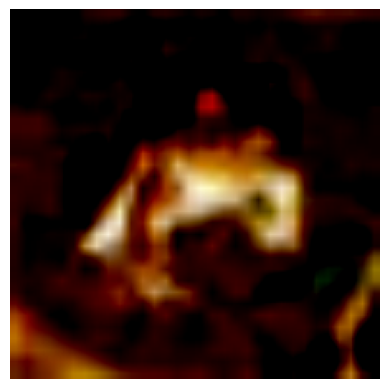

In [ ]:
# Let's visualize the first image in the train_dataset
import matplotlib.pyplot as plt

# Permute the image tensor from 3x224x224 to 224x224x3
image = torch.permute(feature, (1, 2, 0))

# Display the image
plt.imshow(image)
print('Label: ', train_dataset.classes[label], "("+str(label)+")")
plt.axis('off') # To remove axis label 
plt.show()

## DataLoader for train-test Dataset

In [ ]:
from torch.utils.data import random_split
val_size = 5000
train_size = len(train_dataset) - val_size 

train_ds, val_ds = random_split(train_dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [ ]:
# Load the above split data
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=256, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=256, shuffle=True)

In [ ]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)

In [ ]:
# Example from train_loader
train_iterate = iter(train_loader)
features, labels = next(train_iterate)
features.shape

torch.Size([256, 3, 224, 224])

Thus, there are 256 images in a  batch with shape 3x224x224. 

# Overfit data
- Dataset contains only 2 images of 5 class -- 10 images in total

In [ ]:
# New list to store final dataset
custom_dataset = [train_dataset[1], train_dataset[2], train_dataset[3], train_dataset[4], train_dataset[5], train_dataset[6], train_dataset[7], train_dataset[10], train_dataset[11], train_dataset[13]]

In [ ]:
feature_custom, label_custom = custom_dataset[9]

In [ ]:
feature_custom, label_custom

(tensor([[[-0.8667, -0.8667, -0.8667,  ..., -0.8510, -0.8510, -0.8510],
          [-0.8667, -0.8667, -0.8667,  ..., -0.8510, -0.8510, -0.8510],
          [-0.8667, -0.8667, -0.8667,  ..., -0.8510, -0.8510, -0.8510],
          ...,
          [ 0.6471,  0.6471,  0.6471,  ..., -0.7490, -0.7490, -0.7490],
          [ 0.6471,  0.6471,  0.6471,  ..., -0.7490, -0.7490, -0.7490],
          [ 0.6471,  0.6471,  0.6471,  ..., -0.7490, -0.7490, -0.7490]],
 
         [[-0.9765, -0.9765, -0.9765,  ..., -0.9294, -0.9294, -0.9294],
          [-0.9765, -0.9765, -0.9765,  ..., -0.9294, -0.9294, -0.9294],
          [-0.9765, -0.9765, -0.9765,  ..., -0.9294, -0.9294, -0.9294],
          ...,
          [ 0.6314,  0.6314,  0.6314,  ..., -0.8196, -0.8196, -0.8196],
          [ 0.6314,  0.6314,  0.6314,  ..., -0.8196, -0.8196, -0.8196],
          [ 0.6314,  0.6314,  0.6314,  ..., -0.8196, -0.8196, -0.8196]],
 
         [[-0.9843, -0.9843, -0.9843,  ..., -0.9451, -0.9451, -0.9451],
          [-0.9843, -0.9843,

Label:  bird (2)


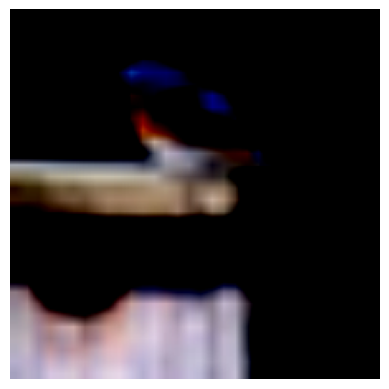

In [ ]:
# Let's visualize the first image in the custom_dataset
import matplotlib.pyplot as plt

# Permute the image tensor from 3x224x224 to 224x224x3
image = torch.permute(feature_custom, (1, 2, 0))

# Display the image
plt.imshow(image)
print('Label: ', train_dataset.classes[label_custom], "("+str(label_custom)+")")
plt.axis('off') # To remove axis label 
plt.show()

In [ ]:
from torch.utils.data import Dataset

# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        image, label = self.data[index]
        return image, label

In [ ]:
# Create an instance of the custom dataset
overfit = CustomDataset(custom_dataset)

In [ ]:
# Len of overfit
len(overfit)

10

There are 10 images in the overfit.

# Training Loop

In [ ]:
# Compile tha model 
import torch.optim as optim

# Define the optimizer
optimizer = optim.Adam(cifar_10_model.parameters(), lr=0.001)

# Define the loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
cifar_10_model = cifar_10_model.to(device)

## Overfit Dataset with batch size 1

In [ ]:
# Create DataLoader for overfit data
overfit_loader = torch.utils.data.DataLoader(overfit, batch_size=1, shuffle=True)

In [ ]:
# Example checking the overfit_loader
of_iter = iter(overfit_loader)
of_feature, of_label = next(of_iter)
of_feature.shape

torch.Size([1, 3, 224, 224])

Thus, the overfit dataset has a batch which yields 1 images with size 3x224x224.

In [ ]:
# Overfitting in overfit dataset i.e 10 images

history = [] # To plot the history for epoch vs. loss

for epoch in range(100):

  cifar_10_model.train()

  running_loss = 0.0
  running_corrects = 0

  # Iterate over the training data in batches
  for inputs, labels in overfit_loader:  
      # Move the inputs and labels to the selected device
      inputs = inputs.to(device)
      labels = labels.to(device)

      # Forward pass
      outputs = cifar_10_model(inputs)
      torch.cuda.empty_cache() # Limit GPU memory growth

      # Calculate the loss
      loss = criterion(outputs, labels)

      # Backward pass and optimization
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      torch.cuda.empty_cache() # Limit GPU memory growth

      # Update running loss and accuracy
      running_loss += loss.item() * inputs.size(0)
      _, preds = torch.max(outputs, 1)
      running_corrects += torch.sum(preds == labels.data)

  # Calculate epoch loss and accuracy for training data
  epoch_loss = running_loss / len(overfit)
  epoch_acc = running_corrects.double() / len(overfit)
  history.append(epoch_loss)

  # Print the loss and accuracy for overfit data
  print(f"Epoch [{epoch+1}/{10}], "
        f"Overfit Loss: {epoch_loss:.4f}, Overfit Accuracy: {epoch_acc:.4f}")


Epoch [1/10], Overfit Loss: 2.4979, Overfit Accuracy: 0.0000
Epoch [2/10], Overfit Loss: 2.4655, Overfit Accuracy: 0.0000
Epoch [3/10], Overfit Loss: 1.8684, Overfit Accuracy: 0.1000
Epoch [4/10], Overfit Loss: 1.8059, Overfit Accuracy: 0.1000
Epoch [5/10], Overfit Loss: 1.8600, Overfit Accuracy: 0.2000
Epoch [6/10], Overfit Loss: 1.6498, Overfit Accuracy: 0.3000
Epoch [7/10], Overfit Loss: 1.7221, Overfit Accuracy: 0.1000
Epoch [8/10], Overfit Loss: 1.6766, Overfit Accuracy: 0.1000
Epoch [9/10], Overfit Loss: 1.6946, Overfit Accuracy: 0.0000
Epoch [10/10], Overfit Loss: 1.6593, Overfit Accuracy: 0.1000
Epoch [11/10], Overfit Loss: 1.6858, Overfit Accuracy: 0.0000
Epoch [12/10], Overfit Loss: 1.7186, Overfit Accuracy: 0.0000
Epoch [13/10], Overfit Loss: 1.6755, Overfit Accuracy: 0.1000
Epoch [14/10], Overfit Loss: 1.6675, Overfit Accuracy: 0.0000
Epoch [15/10], Overfit Loss: 1.6240, Overfit Accuracy: 0.2000
Epoch [16/10], Overfit Loss: 1.6858, Overfit Accuracy: 0.1000
Epoch [17/10], Ov

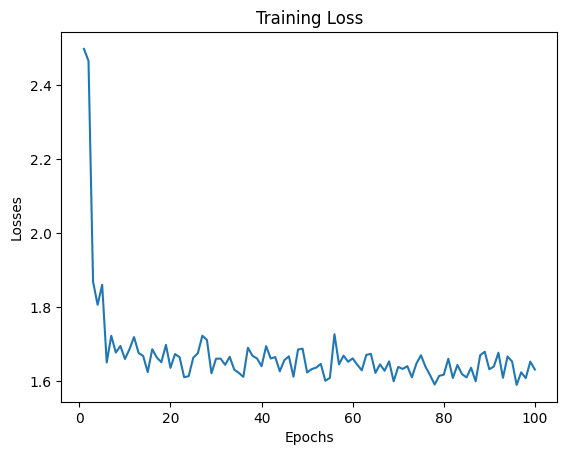

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(history)+1)

# Plot losses
plt.plot(epochs, history)
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Training Loss")
plt.show()

In [ ]:
correct = 0
total = 0

with torch.no_grad(): # Disabling gradient calculation, since testing doesnot require weight update
    cifar_10_model.eval() # Set the model to evaluation mode

    for inputs, labels in overfit_loader:
      # Move the inputs and labels to the selected device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass 
        outputs = cifar_10_model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 20.00%


In [ ]:
# Set the model to evaluation mode
model.eval()

# Iterate over the data loader
for images, labels in overfit_loader:

    images = images.to(device)
    labels = labels.to(device)
    # Forward pass
    outputs = cifar_10_model(images)
    _, predicted_indices = torch.topk(outputs, k=5, dim=1)
    
    # Print the true label and the top 5 predicted class indices
    print(f"True Label: {labels[0]}")
    print("Top 5 Predicted Class Indices:")
    for i, idx in enumerate(predicted_indices[0]):
        print(f"{i+1}. {idx.item()}")
    print("--------------------")

True Label: 4
Top 5 Predicted Class Indices:
1. 9
2. 4
3. 2
4. 1
5. 7
--------------------
True Label: 9
Top 5 Predicted Class Indices:
1. 9
2. 4
3. 2
4. 1
5. 7
--------------------
True Label: 1
Top 5 Predicted Class Indices:
1. 9
2. 4
3. 2
4. 1
5. 7
--------------------
True Label: 1
Top 5 Predicted Class Indices:
1. 9
2. 4
3. 2
4. 1
5. 7
--------------------
True Label: 2
Top 5 Predicted Class Indices:
1. 9
2. 4
3. 2
4. 1
5. 7
--------------------
True Label: 9
Top 5 Predicted Class Indices:
1. 9
2. 4
3. 2
4. 1
5. 7
--------------------
True Label: 4
Top 5 Predicted Class Indices:
1. 9
2. 4
3. 2
4. 1
5. 7
--------------------
True Label: 2
Top 5 Predicted Class Indices:
1. 9
2. 4
3. 2
4. 1
5. 7
--------------------
True Label: 7
Top 5 Predicted Class Indices:
1. 9
2. 4
3. 2
4. 1
5. 7
--------------------
True Label: 7
Top 5 Predicted Class Indices:
1. 9
2. 4
3. 2
4. 1
5. 7
--------------------


**Note:** predicted_indices[0] is used in the code because the batch size is 1, and it allows us to access the predicted class indices for the first (and only) image in the batch. If the batch size is greater than 1, you would iterate over predicted_indices directly.

```
# Example with batch size 2 and k = 3
predicted_indices = torch.tensor([[1, 3, 2], [0, 4, 1]])

print(predicted_indices)
# Output:
# tensor([[1, 3, 2],
#         [0, 4, 1]])

```

In this example, predicted_indices has a shape of (2, 3) because the batch size is 2, and we are predicting the top 3 class indices for each image. The first row corresponds to the predicted class indices for the first image, and the second row corresponds to the predicted class indices for the second image.